In this notebook, we are trying to visualize the choices of our models.

# Imports

In [1]:
%matplotlib inline
import crime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load Data

In [2]:
train = crime.load_cleaned_train()
y = train.pop('CategoryNumber')

# Create Models

For this visualization, we're only using the X and Y data since that should be easy to plot on a map.

In [3]:
predictors = ['X', 'Y']

rf_alg = RandomForestClassifier(n_estimators=20, max_depth=15)
rf_alg.fit(train[predictors], y)

knn_alg = KNeighborsClassifier(n_neighbors=150)
knn_alg.fit(train[predictors], y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

# Create Mapping Function

In [6]:
# Following code adapted from https://www.kaggle.com/dbennett/sf-crime/test-map

# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

cmap = ['r', 'lime', 'b', 'yellow', 'cyan', 'magenta', 'k', 'lightgray', 'sienna', 'orange'] * 4

def plotOnMap(df, predictions):
    """
    Plot the given data frame on the map, coloring by category
    """
    fig = plt.figure(figsize=(15,15))
#     i = 0;
    for p in np.unique(predictions):
        mask = predictions == p
        plt.scatter(df.X[mask], df.Y[mask], label=crime.CATEGORIES[p], c=cmap[p], alpha=0.45)
#         i += 1
    for ax in fig.axes:
        ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                  extent=lon_lat_box, 
                  aspect=asp)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return fig

# Find Predictions and Plot

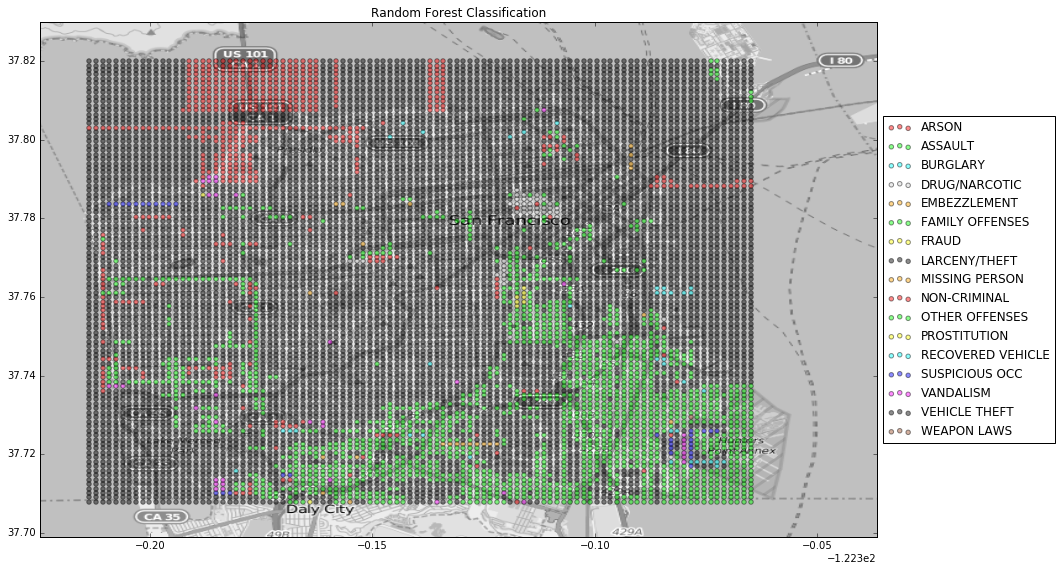

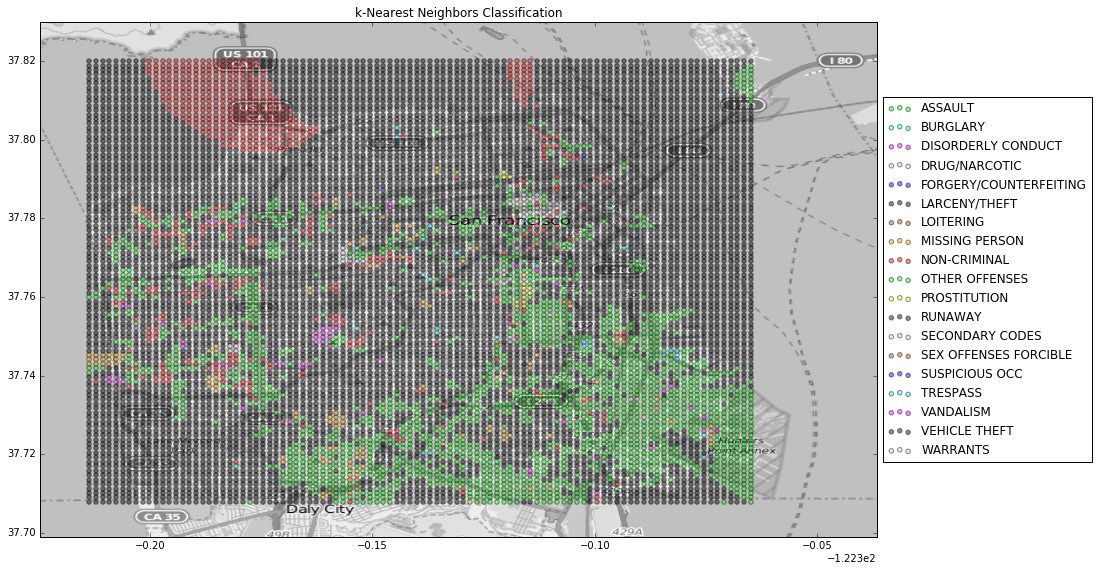

In [7]:
numX = 100
numY = 100

xyGrid = np.mgrid[:numX,:numY].reshape(2,-1).T
df = pd.DataFrame(xyGrid)
df.columns = ['X', 'Y']

minX = train.X.min()
maxX = train.X.max()
minY = train.Y.min()
maxY = train.Y.max()

df.X = df.X / df.X.max() * (maxX - minX) + minX
df.Y = df.Y / df.Y.max() * (maxY - minY) + minY

predictions = rf_alg.predict(df)
plotOnMap(df, predictions)
plt.title('Random Forest Classification')

predictions = knn_alg.predict(df)
plotOnMap(df, predictions)
plt.title('k-Nearest Neighbors Classification')

There are quite a few similarities seen between results of the Random Forest model and k-Nearest Neighbors model, but also differences.  The k-NN results seem noisier, with more small pockets showing up.  A hypothesis that unfortunately cannot be tested on our laptops is that k-NN with a large value of _k_ would be more resistant to this noise and appear more like the RF results.